# Load the image blocks 

Into the dataset class.

In [81]:
import h5py
import csv
import numpy as np
import matplotlib.pyplot as plt

import importlib as imp

In [32]:
image_id = 120271
samples_per_patch = 3
test_db_dir = "/Users/ysbecca/ysbecca-projects/bcsp-expert/data/temp_db/"


patch_files = []
for i in range(samples_per_patch):
    patch_files.append(str(image_id) + "_T_" + str(i) + ".h5")
    
csv_file = str(image_id) + "_T.csv"

In [33]:
coords, labels, image_ids, rois = [], [], [], []

# First read patch meta data
with open(test_db_dir + csv_file, newline='') as metafile:
    reader = csv.reader(metafile, delimiter=' ', quotechar='|')
    for row in reader:
        # Made a mistake saving the label as an array... so deconstruct now.
        index_1 = int(row[0][4])
        new_label = [1, 0]
        if index_1:
            new_label = [0, 1]
        labels.append(np.array(new_label, dtype=np.int8))
        coords.append(np.array([int(row[1]), int(row[2])]))
        rois.append(int(row[3]))
        image_ids.append(image_id)

In [60]:
patches = [[], [], []]

for i, p in enumerate(patch_files):
    # Now load the images from H5 file
    file = h5py.File(test_db_dir + p,'r+')
    new_patches = np.array(file['dataset']).astype('uint8')
    for patch in new_patches:
        patches[i].append(np.array(patch))

    del new_patches
    file.close()
    
patches = np.array(patches)

In [61]:
print(np.shape(patches))
print(np.shape(patches[0][0]))

(3, 12, 256, 256, 3)
(256, 256, 3)


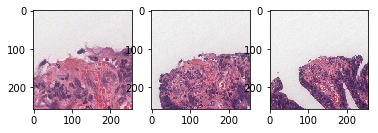

In [72]:
to_view = 2
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(patches[i][to_view])
plt.show()

Now create the 3D input image blocks.

In [75]:
test = np.concatenate((patches[0][0], patches[1][0], patches[2][0]), axis=2)

In [76]:
np.shape(test)

(256, 256, 9)

Do it for all the patches in a loop.

In [77]:
stacked_images = []

for i in range(np.shape(patches)[1]):
    stacked_images.append(np.concatenate((patches[0][i], patches[1][i], patches[2][i]), axis=2))

In [78]:
np.shape(stacked_images)

(12, 256, 256, 9)

### Dataset Class

In [105]:
import scripts.dataset as ds
imp.reload(ds)

<module 'scripts.dataset' from '/Users/ysbecca/ysbecca-projects/bcsp-expert/scripts/dataset.py'>

In [106]:
dataset = ds.read_k_dataset(0, 2, shuffle_all=False, do_augments=False, is_test=True)

Cases:            ['0025', '0037']
Ground truth:     ['EM', 'C']
Selected:         [ 1.  0.]
Before stacking:  (3, 12, 256, 256, 3)
After stacking:   (12, 256, 256, 9)
LOADED k-set:     0
(12, 256, 256, 9)
(12, 2)
(12, 2)
(12,)


In [111]:
dataset.num_images

12